In [3]:
import numpy as np
import pandas as pd
import sklearn
import scipy


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest


In [5]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


In [6]:
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SPEED=42
LABELS=["Normal","Fraud"]

In [7]:
data = pd.read_csv('C:\\Users\\AKASH\\Downloads\\dataset123.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    767 non-null    int64  
 1   V1      767 non-null    float64
 2   V2      767 non-null    float64
 3   V3      767 non-null    float64
 4   V4      767 non-null    float64
 5   V5      767 non-null    float64
 6   V6      767 non-null    float64
 7   V7      767 non-null    float64
 8   V8      767 non-null    float64
 9   V9      767 non-null    float64
 10  V10     767 non-null    float64
 11  V11     767 non-null    float64
 12  V12     767 non-null    float64
 13  V13     767 non-null    float64
 14  V14     767 non-null    float64
 15  V15     767 non-null    float64
 16  V16     767 non-null    float64
 17  V17     767 non-null    float64
 18  V18     767 non-null    float64
 19  V19     767 non-null    float64
 20  V20     767 non-null    float64
 21  V21     767 non-null    float64
 22  V2

In [9]:
#1 means fraud transaction and 0 means non fraud dataset in the dataset they have applied pca and given that form its not the original data cause the data is very sophisticated


In [10]:
columns=data.columns.tolist()
#filter the data column to remove data we don't want
columns=[c for c in columns if  c not in ["Class"]]
target="Class"
state=np.random.RandomState(42)
X=data[columns]
Y=data[target]
X_outliers=state.uniform(low=0,high=1,size=(X.shape[0],X.shape[1]))
print(X.shape)
print(Y.shape)

(767, 30)
(767,)


In [11]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

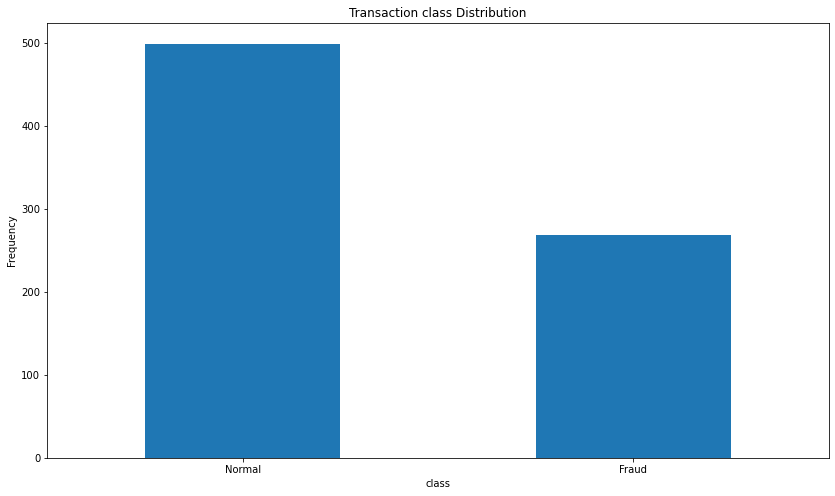

In [12]:
count_classes=pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transaction class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("class")
plt.ylabel("Frequency")

In [13]:
fraud=data[data["Class"]==1]
normal=data[data["Class"]==0]

In [14]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [15]:
from imblearn.under_sampling import NearMiss


In [16]:

nm=NearMiss()
X_res,y_res=nm.fit_resample(X,Y)


In [17]:
X_res.shape,y_res.shape

((984, 30), (984,))

Text(0, 0.5, 'Frequency')

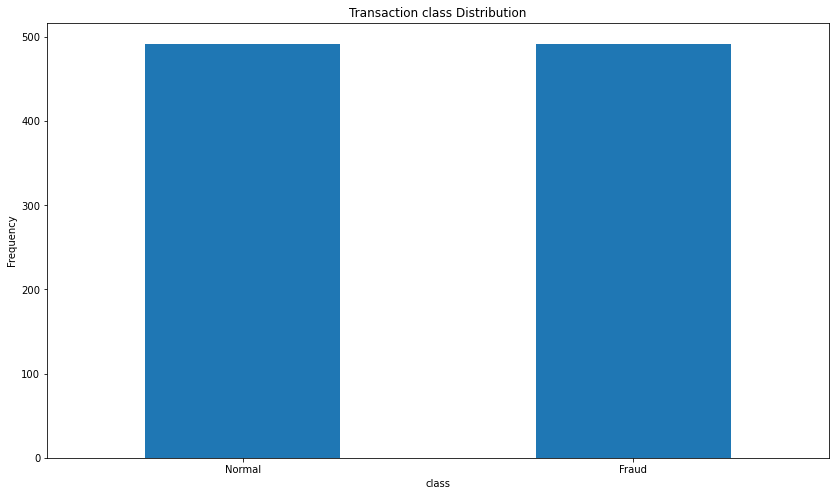

In [18]:
count_classes=pd.value_counts(y_res,sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transaction class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("class")
plt.ylabel("Frequency")

In [19]:
from collections import Counter

In [20]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, Y)

In [23]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_ros)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


Text(0, 0.5, 'Frequency')

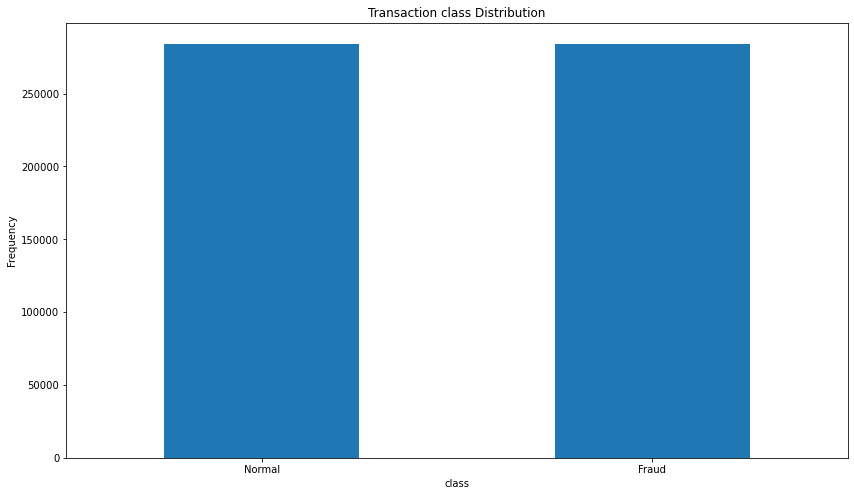

In [24]:
count_classes=pd.value_counts(y_ros,sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transaction class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("class")
plt.ylabel("Frequency")

In [25]:
from imblearn.over_sampling import SMOTE 

In [26]:
sm = SMOTE(random_state=42)
X_rs, y_rs = sm.fit_resample(X, Y)


In [27]:
print('Original dataset shape using smote {}'.format(Counter(Y)))
print('Resampled dataset shape using smote{}'.format(Counter(y_rs)))

Original dataset shape using smote Counter({0: 284315, 1: 492})
Resampled dataset shape using smoteCounter({0: 284315, 1: 284315})


Text(0, 0.5, 'Frequency')

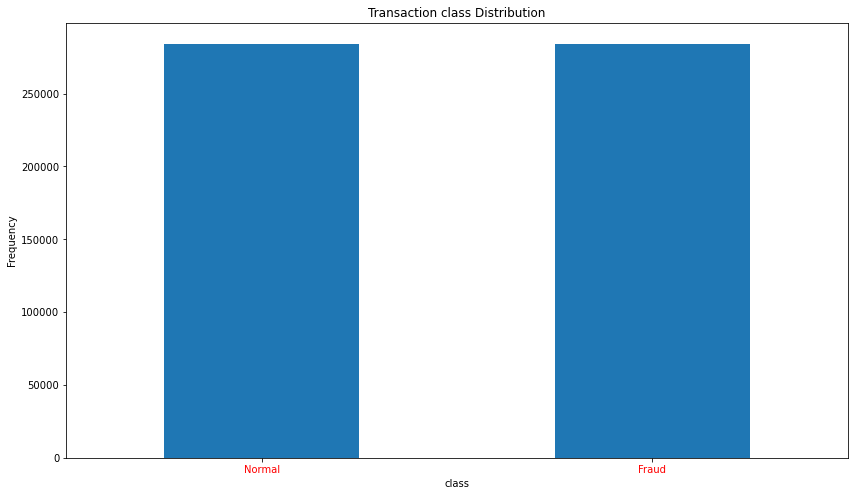

In [28]:
count_classes=pd.value_counts(y_rs,sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transaction class Distribution")
plt.xticks(range(2),LABELS,color='red')
plt.xlabel("class")
plt.ylabel("Frequency")

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve



In [30]:
def splittingData(X_rec,y_rec):
    X_train, X_test, y_train, y_test = train_test_split(X_rec, y_rec, test_size=0.2, random_state=42)
    return X_train,X_test,y_train,y_test

In [38]:
def training_prediction(model_name, model, X_train_set, y_train_set, X_test_set, y_test_set):
    model().fit(X_train_set, y_train_set)
    y_pred = model.predict(X_test_set)
    cm1=confusion_matrix(y_test_set, y_pred)
    print("Confusion matrix : ",cm1)
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        total1=sum(sum(cm1))
        Accuracy = (cm1[0,0]+cm1[1,1])/total1
        Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    TN = cm1[0][0]
    FN = cm1[1][0]
    TP = cm1[1][1]
    FP = cm1[0][1]
    
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    Precision = TP / (TP + FP)
    print("Precision is: ",Precision)
    print("true postive rate : ",TPR)
    print("true negative rate: ",TNR)
    print("Accuracy Score: ",Accuracy)
    print("Specificity is: ",Specificity)
    print("Sensitivity is: ",Sensitivity)
    print("Recall Score : ",recall_score(y_test_set, y_pred, average='macro'))
    score = f1_score(y_test_set, y_pred, average='binary')
    print("f1 score is: ",score)
    print("Classification Report for {0} is as follows".format(model_name))
    print(classification_report(y_test_set, y_pred))


# LOGISTIC REGRESSION CLASSIFIER

In [32]:
logisticRegressionModel = LogisticRegression(solver='liblinear',penalty='l1',max_iter=100, dual=False)

In [33]:

X_ori_train, X_ori_test, y_ori_train, y_ori_test = splittingData(X,Y)
training_prediction('OD - ORIGINAL DATASET', logisticRegressionModel, X_ori_train, y_ori_train, X_ori_test, y_ori_test)

Confusion matrix :  [[56855     9]
 [   41    57]]
Precision is:  0.8636363636363636
true postive rate :  0.5816326530612245
true negative rate:  0.9998417276308385
Accuracy Score:  0.9991222218320986
Specificity is:  0.9998417276308385
Sensitivity is:  0.5816326530612245
Recall Score :  0.7907371903460314
f1 score is:  0.6951219512195121
Classification Report for OD - ORIGINAL DATASET is as follows
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
X_under_train, X_under_test, y_under_train, y_under_test = splittingData(X_res, y_res)
training_prediction('LR - Random Under Sampling', logisticRegressionModel, X_under_train, y_under_train, X_under_test, y_under_test)

Confusion matrix :  [[95  4]
 [ 8 90]]
Precision is:  0.9574468085106383
true postive rate :  0.9183673469387755
true negative rate:  0.9595959595959596
Accuracy Score:  0.9390862944162437
Specificity is:  0.9595959595959596
Sensitivity is:  0.9183673469387755
Recall Score :  0.9389816532673676
f1 score is:  0.9375000000000001
Classification Report for LR - Random Under Sampling is as follows
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        99
           1       0.96      0.92      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [35]:
X_over_train, X_over_test, y_over_train, y_over_test = splittingData(X_ros, y_ros)
training_prediction('LR - Random Over Sampling', logisticRegressionModel, X_over_train, y_over_train, X_over_test, y_over_test)

Confusion matrix :  [[55461  1289]
 [ 4446 52530]]
Precision is:  0.9760493506010889
true postive rate :  0.9219671440606572
true negative rate:  0.9772863436123348
Accuracy Score:  0.9495717777816858
Specificity is:  0.9772863436123348
Sensitivity is:  0.9219671440606572
Recall Score :  0.949626743836496
f1 score is:  0.9482377363599441
Classification Report for LR - Random Over Sampling is as follows
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.98      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [36]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = splittingData(X_rs,y_rs)
training_prediction('RS-OVERSAMPLING USING SMOTE', logisticRegressionModel, X_sm_train, y_sm_train, X_sm_test, y_sm_test)

Confusion matrix :  [[56249   501]
 [ 1679 55297]]
Precision is:  0.9910211835549662
true postive rate :  0.970531451839371
true negative rate:  0.9911718061674009
Accuracy Score:  0.9808311204122189
Specificity is:  0.9911718061674009
Sensitivity is:  0.970531451839371
Recall Score :  0.980851629003386
f1 score is:  0.9806693032081862
Classification Report for RS-OVERSAMPLING USING SMOTE is as follows
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



# Random Forest Classifier

In [35]:
randomForestModel = RandomForestClassifier()

In [36]:
training_prediction('OD - ORIGINAL DATASET', randomForestModel, X_ori_train, y_ori_train, X_ori_test, y_ori_test)

Confusion matrix :  [[56863     1]
 [   23    75]]
Precision is:  0.9868421052631579
true postive rate :  0.7653061224489796
true negative rate:  0.9999824141812043
Accuracy Score:  0.9995786664794073
Specificity is:  0.9999824141812043
Sensitivity is:  0.7653061224489796
Recall Score :  0.8826442683150919
f1 score is:  0.8620689655172413
Classification Report for OD - ORIGINAL DATASET is as follows
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [37]:
training_prediction('LR - Random Under Sampling', randomForestModel, X_under_train, y_under_train, X_under_test, y_under_test)

Confusion matrix :  [[98  1]
 [ 6 92]]
Precision is:  0.989247311827957
true postive rate :  0.9387755102040817
true negative rate:  0.98989898989899
Accuracy Score:  0.9644670050761421
Specificity is:  0.98989898989899
Sensitivity is:  0.9387755102040817
Recall Score :  0.9643372500515358
f1 score is:  0.9633507853403142
Classification Report for LR - Random Under Sampling is as follows
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        99
           1       0.99      0.94      0.96        98

    accuracy                           0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.97      0.96      0.96       197



In [38]:
training_prediction('LR - Random Over Sampling', randomForestModel, X_over_train, y_over_train, X_over_test, y_over_test)

Confusion matrix :  [[56745     5]
 [    0 56976]]
Precision is:  0.9999122514522385
true postive rate :  1.0
true negative rate:  0.9999118942731278
Accuracy Score:  0.9999560346798445
Specificity is:  0.9999118942731278
Sensitivity is:  1.0
Recall Score :  0.9999559471365639
f1 score is:  0.9999561238010829
Classification Report for LR - Random Over Sampling is as follows
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [39]:
training_prediction('RS-OVERSAMPLING USING SMOTE', randomForestModel, X_sm_train, y_sm_train, X_sm_test, y_sm_test)

Confusion matrix :  [[56739    11]
 [    0 56976]]
Precision is:  0.9998069735202766
true postive rate :  1.0
true negative rate:  0.999806167400881
Accuracy Score:  0.999903276295658
Specificity is:  0.999806167400881
Sensitivity is:  1.0
Recall Score :  0.9999030837004406
f1 score is:  0.9999034774444338
Classification Report for RS-OVERSAMPLING USING SMOTE is as follows
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



# DECISION TREE CLASSIFIER

In [40]:
from sklearn.tree import DecisionTreeClassifier
DecisiontreeModel = DecisionTreeClassifier()

In [41]:
training_prediction('OD - ORIGINAL DATASET', DecisiontreeModel, X_ori_train, y_ori_train, X_ori_test, y_ori_test)

Confusion matrix :  [[56832    32]
 [   22    76]]
Precision is:  0.7037037037037037
true postive rate :  0.7755102040816326
true negative rate:  0.9994372537985369
Accuracy Score:  0.9990519995786665
Specificity is:  0.9994372537985369
Sensitivity is:  0.7755102040816326
Recall Score :  0.8874737289400847
f1 score is:  0.7378640776699029
Classification Report for OD - ORIGINAL DATASET is as follows
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.78      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [42]:
training_prediction('LR - Random Under Sampling', DecisiontreeModel, X_under_train, y_under_train, X_under_test, y_under_test)

Confusion matrix :  [[97  2]
 [ 7 91]]
Precision is:  0.978494623655914
true postive rate :  0.9285714285714286
true negative rate:  0.9797979797979798
Accuracy Score:  0.9543147208121827
Specificity is:  0.9797979797979798
Sensitivity is:  0.9285714285714286
Recall Score :  0.9541847041847042
f1 score is:  0.9528795811518325
Classification Report for LR - Random Under Sampling is as follows
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        99
           1       0.98      0.93      0.95        98

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197



In [43]:
training_prediction('LR - Random Over Sampling', DecisiontreeModel, X_over_train, y_over_train, X_over_test, y_over_test)

Confusion matrix :  [[56724    26]
 [    0 56976]]
Precision is:  0.9995438756534858
true postive rate :  1.0
true negative rate:  0.9995418502202643
Accuracy Score:  0.9997713803351916
Specificity is:  0.9995418502202643
Sensitivity is:  1.0
Recall Score :  0.9997709251101321
f1 score is:  0.9997718858025233
Classification Report for LR - Random Over Sampling is as follows
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [44]:
training_prediction('RS-OVERSAMPLING USING SMOTE', DecisiontreeModel, X_sm_train, y_sm_train, X_sm_test, y_sm_test)

Confusion matrix :  [[56627   123]
 [   29 56947]]
Precision is:  0.997844752058875
true postive rate :  0.9994910137601797
true negative rate:  0.9978325991189427
Accuracy Score:  0.998663454267274
Specificity is:  0.9978325991189427
Sensitivity is:  0.9994910137601797
Recall Score :  0.9986618064395612
f1 score is:  0.9986672044613576
Classification Report for RS-OVERSAMPLING USING SMOTE is as follows
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



# BAGGING CLASSIFIER

In [45]:
from sklearn.ensemble import BaggingClassifier
BaggingCModel=BaggingClassifier()

In [46]:
training_prediction('OD - ORIGINAL DATASET', DecisiontreeModel, X_ori_train, y_ori_train, X_ori_test, y_ori_test)

Confusion matrix :  [[56833    31]
 [   20    78]]
Precision is:  0.7155963302752294
true postive rate :  0.7959183673469388
true negative rate:  0.9994548396173326
Accuracy Score:  0.9991046662687406
Specificity is:  0.9994548396173326
Sensitivity is:  0.7959183673469388
Recall Score :  0.8976866034821357
f1 score is:  0.7536231884057972
Classification Report for OD - ORIGINAL DATASET is as follows
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.80      0.75        98

    accuracy                           1.00     56962
   macro avg       0.86      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [47]:
training_prediction('LR - Random Under Sampling', BaggingCModel, X_under_train, y_under_train, X_under_test, y_under_test)

Confusion matrix :  [[98  1]
 [ 7 91]]
Precision is:  0.9891304347826086
true postive rate :  0.9285714285714286
true negative rate:  0.98989898989899
Accuracy Score:  0.9593908629441624
Specificity is:  0.98989898989899
Sensitivity is:  0.9285714285714286
Recall Score :  0.9592352092352092
f1 score is:  0.9578947368421052
Classification Report for LR - Random Under Sampling is as follows
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        99
           1       0.99      0.93      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [48]:
training_prediction('LR - Random Over Sampling', BaggingCModel, X_over_train, y_over_train, X_over_test, y_over_test)

Confusion matrix :  [[56721    29]
 [    0 56976]]
Precision is:  0.9994912726953776
true postive rate :  1.0
true negative rate:  0.999488986784141
Accuracy Score:  0.9997450011430983
Specificity is:  0.999488986784141
Sensitivity is:  1.0
Recall Score :  0.9997444933920705
f1 score is:  0.9997455716303594
Classification Report for LR - Random Over Sampling is as follows
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [49]:
training_prediction('RS-OVERSAMPLING USING SMOTE', BaggingCModel, X_sm_train, y_sm_train, X_sm_test, y_sm_test)

Confusion matrix :  [[56703    47]
 [   18 56958]]
Precision is:  0.9991755109200947
true postive rate :  0.9996840775063185
true negative rate:  0.9991718061674009
Accuracy Score:  0.999428450837979
Specificity is:  0.9991718061674009
Sensitivity is:  0.9996840775063185
Recall Score :  0.9994279418368597
f1 score is:  0.9994297295163229
Classification Report for RS-OVERSAMPLING USING SMOTE is as follows
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



# ADABOOST CLASSIFIER

In [49]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()

In [51]:
training_prediction('OD - ORIGINAL DATASET', model, X_ori_train, y_ori_train, X_ori_test, y_ori_test)

Confusion matrix :  [[56852    12]
 [   27    71]]
Precision is:  0.8554216867469879
true postive rate :  0.7244897959183674
true negative rate:  0.9997889701744513
Accuracy Score:  0.9993153330290369
Specificity is:  0.9997889701744513
Sensitivity is:  0.7244897959183674
Recall Score :  0.8621393830464094
f1 score is:  0.7845303867403315
Classification Report for OD - ORIGINAL DATASET is as follows
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.72      0.78        98

    accuracy                           1.00     56962
   macro avg       0.93      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [52]:
training_prediction('LR - Random Under Sampling', model, X_under_train, y_under_train, X_under_test, y_under_test)

Confusion matrix :  [[98  1]
 [ 5 93]]
Precision is:  0.9893617021276596
true postive rate :  0.9489795918367347
true negative rate:  0.98989898989899
Accuracy Score:  0.9695431472081218
Specificity is:  0.98989898989899
Sensitivity is:  0.9489795918367347
Recall Score :  0.9694392908678624
f1 score is:  0.96875
Classification Report for LR - Random Under Sampling is as follows
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        99
           1       0.99      0.95      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



In [53]:
training_prediction('LR - Random Over Sampling', model, X_over_train, y_over_train, X_over_test, y_over_test)

Confusion matrix :  [[55643  1107]
 [ 2617 54359]]
Precision is:  0.9800418274258104
true postive rate :  0.9540683796686324
true negative rate:  0.9804933920704846
Accuracy Score:  0.9672546295482124
Specificity is:  0.9804933920704846
Sensitivity is:  0.9540683796686324
Recall Score :  0.9672808858695585
f1 score is:  0.9668807029401824
Classification Report for LR - Random Over Sampling is as follows
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56750
           1       0.98      0.95      0.97     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



In [50]:
training_prediction('RS-OVERSAMPLING USING SMOTE', model, X_sm_train, y_sm_train, X_sm_test, y_sm_test)

Confusion matrix :  [[56038   712]
 [ 1596 55380]]
Precision is:  0.9873065677815018
true postive rate :  0.9719882055602359
true negative rate:  0.9874537444933921
Accuracy Score:  0.979705608216239
Specificity is:  0.9874537444933921
Sensitivity is:  0.9719882055602359
Recall Score :  0.979720975026814
f1 score is:  0.9795875048643294
Classification Report for RS-OVERSAMPLING USING SMOTE is as follows
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



# GRADIENT BOOSTING CLASSIFIER

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
GBModel=GradientBoostingClassifier()

In [39]:
training_prediction('OD - ORIGINAL DATASET', GBModel, X_ori_train, y_ori_train, X_ori_test, y_ori_test)

Confusion matrix :  [[56843    21]
 [   39    59]]
Precision is:  0.7375
true postive rate :  0.6020408163265306
true negative rate:  0.9996306978052898
Accuracy Score:  0.9989466661985184
Specificity is:  0.9996306978052898
Sensitivity is:  0.6020408163265306
Recall Score :  0.8008357570659101
f1 score is:  0.6629213483146067
Classification Report for OD - ORIGINAL DATASET is as follows
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [40]:
training_prediction('LR - Random Under Sampling', GBModel, X_under_train, y_under_train, X_under_test, y_under_test)

Confusion matrix :  [[98  1]
 [ 7 91]]
Precision is:  0.9891304347826086
true postive rate :  0.9285714285714286
true negative rate:  0.98989898989899
Accuracy Score:  0.9593908629441624
Specificity is:  0.98989898989899
Sensitivity is:  0.9285714285714286
Recall Score :  0.9592352092352092
f1 score is:  0.9578947368421052
Classification Report for LR - Random Under Sampling is as follows
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        99
           1       0.99      0.93      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [41]:
training_prediction('LR - Random Over Sampling', GBModel, X_over_train, y_over_train, X_over_test, y_over_test)

Confusion matrix :  [[56262   488]
 [  468 56508]]
Precision is:  0.9914379956488175
true postive rate :  0.9917860151642797
true negative rate:  0.9914008810572688
Accuracy Score:  0.9915938307862758
Specificity is:  0.9914008810572688
Sensitivity is:  0.9917860151642797
Recall Score :  0.9915934481107742
f1 score is:  0.9916119748710209
Classification Report for LR - Random Over Sampling is as follows
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56750
           1       0.99      0.99      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



In [42]:
training_prediction('RS-OVERSAMPLING USING SMOTE', GBModel, X_sm_train, y_sm_train, X_sm_test, y_sm_test)

Confusion matrix :  [[56359   391]
 [ 1079 55897]]
Precision is:  0.9930535815804434
true postive rate :  0.981062201628756
true negative rate:  0.9931101321585903
Accuracy Score:  0.9870741958742943
Specificity is:  0.9931101321585903
Sensitivity is:  0.981062201628756
Recall Score :  0.9870861668936732
f1 score is:  0.9870214719593162
Classification Report for RS-OVERSAMPLING USING SMOTE is as follows
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     56750
           1       0.99      0.98      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



# KNN CLASSIFIER

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)


In [44]:
training_prediction('OD - ORIGINAL DATASET', classifier, X_ori_train, y_ori_train, X_ori_test, y_ori_test)


Confusion matrix :  [[56864     0]
 [   93     5]]
Precision is:  1.0
true postive rate :  0.05102040816326531
true negative rate:  1.0
Accuracy Score:  0.9983673326077034
Specificity is:  1.0
Sensitivity is:  0.05102040816326531
Recall Score :  0.5255102040816326
f1 score is:  0.09708737864077671
Classification Report for OD - ORIGINAL DATASET is as follows
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.05      0.10        98

    accuracy                           1.00     56962
   macro avg       1.00      0.53      0.55     56962
weighted avg       1.00      1.00      1.00     56962



In [45]:
training_prediction('LR - Random Under Sampling', classifier, X_under_train, y_under_train, X_under_test, y_under_test)


Confusion matrix :  [[99  0]
 [15 83]]
Precision is:  1.0
true postive rate :  0.8469387755102041
true negative rate:  1.0
Accuracy Score:  0.9238578680203046
Specificity is:  1.0
Sensitivity is:  0.8469387755102041
Recall Score :  0.9234693877551021
f1 score is:  0.9171270718232044
Classification Report for LR - Random Under Sampling is as follows
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        99
           1       1.00      0.85      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [46]:
training_prediction('LR - Random Over Sampling', classifier, X_over_train, y_over_train, X_over_test, y_over_test)


Confusion matrix :  [[56631   119]
 [    0 56976]]
Precision is:  0.9979157544443471
true postive rate :  1.0
true negative rate:  0.9979030837004406
Accuracy Score:  0.9989536253803
Specificity is:  0.9979030837004406
Sensitivity is:  1.0
Recall Score :  0.9989515418502203
f1 score is:  0.9989567900693428
Classification Report for LR - Random Over Sampling is as follows
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [47]:
training_prediction('RS-OVERSAMPLING USING SMOTE', classifier, X_sm_train, y_sm_train, X_sm_test, y_sm_test)

Confusion matrix :  [[53841  2909]
 [ 1290 55686]]
Precision is:  0.9503541257786501
true postive rate :  0.9773588879528222
true negative rate:  0.9487400881057269
Accuracy Score:  0.9630779241334435
Specificity is:  0.9487400881057269
Sensitivity is:  0.9773588879528222
Recall Score :  0.9630494880292746
f1 score is:  0.9636673559976119
Classification Report for RS-OVERSAMPLING USING SMOTE is as follows
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     56750
           1       0.95      0.98      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



# END OF THIS PROJECT